In [1]:
import dataset

In [19]:
trainloaders, valloaders, testloaders = dataset.prepare_noise_based_imbalance(60, 10, 0.1, 0.5)

Partition 0 class distribution: {1: 2, 0: 1}
Partition 1 class distribution: {1: 1, 0: 2}
Partition 2 class distribution: {0: 1, 1: 2}
Partition 3 class distribution: {1: 2, 0: 1}
Partition 4 class distribution: {1: 2, 0: 1}
Partition 5 class distribution: {1: 2, 0: 1}
Partition 6 class distribution: {1: 3}
Partition 7 class distribution: {1: 1, 0: 2}
Partition 8 class distribution: {0: 2, 1: 1}
Partition 9 class distribution: {0: 1, 1: 2}
Partition 10 class distribution: {1: 2, 0: 1}
Partition 11 class distribution: {0: 1, 1: 2}
Partition 12 class distribution: {1: 3}
Partition 13 class distribution: {1: 2, 0: 1}
Partition 14 class distribution: {1: 3}
Partition 15 class distribution: {1: 2, 0: 1}
Partition 16 class distribution: {1: 3}
Partition 17 class distribution: {1: 1, 0: 2}
Partition 18 class distribution: {1: 3}
Partition 19 class distribution: {0: 3}
Partition 20 class distribution: {1: 3}
Partition 21 class distribution: {1: 3}
Partition 22 class distribution: {0: 1, 1: 2}


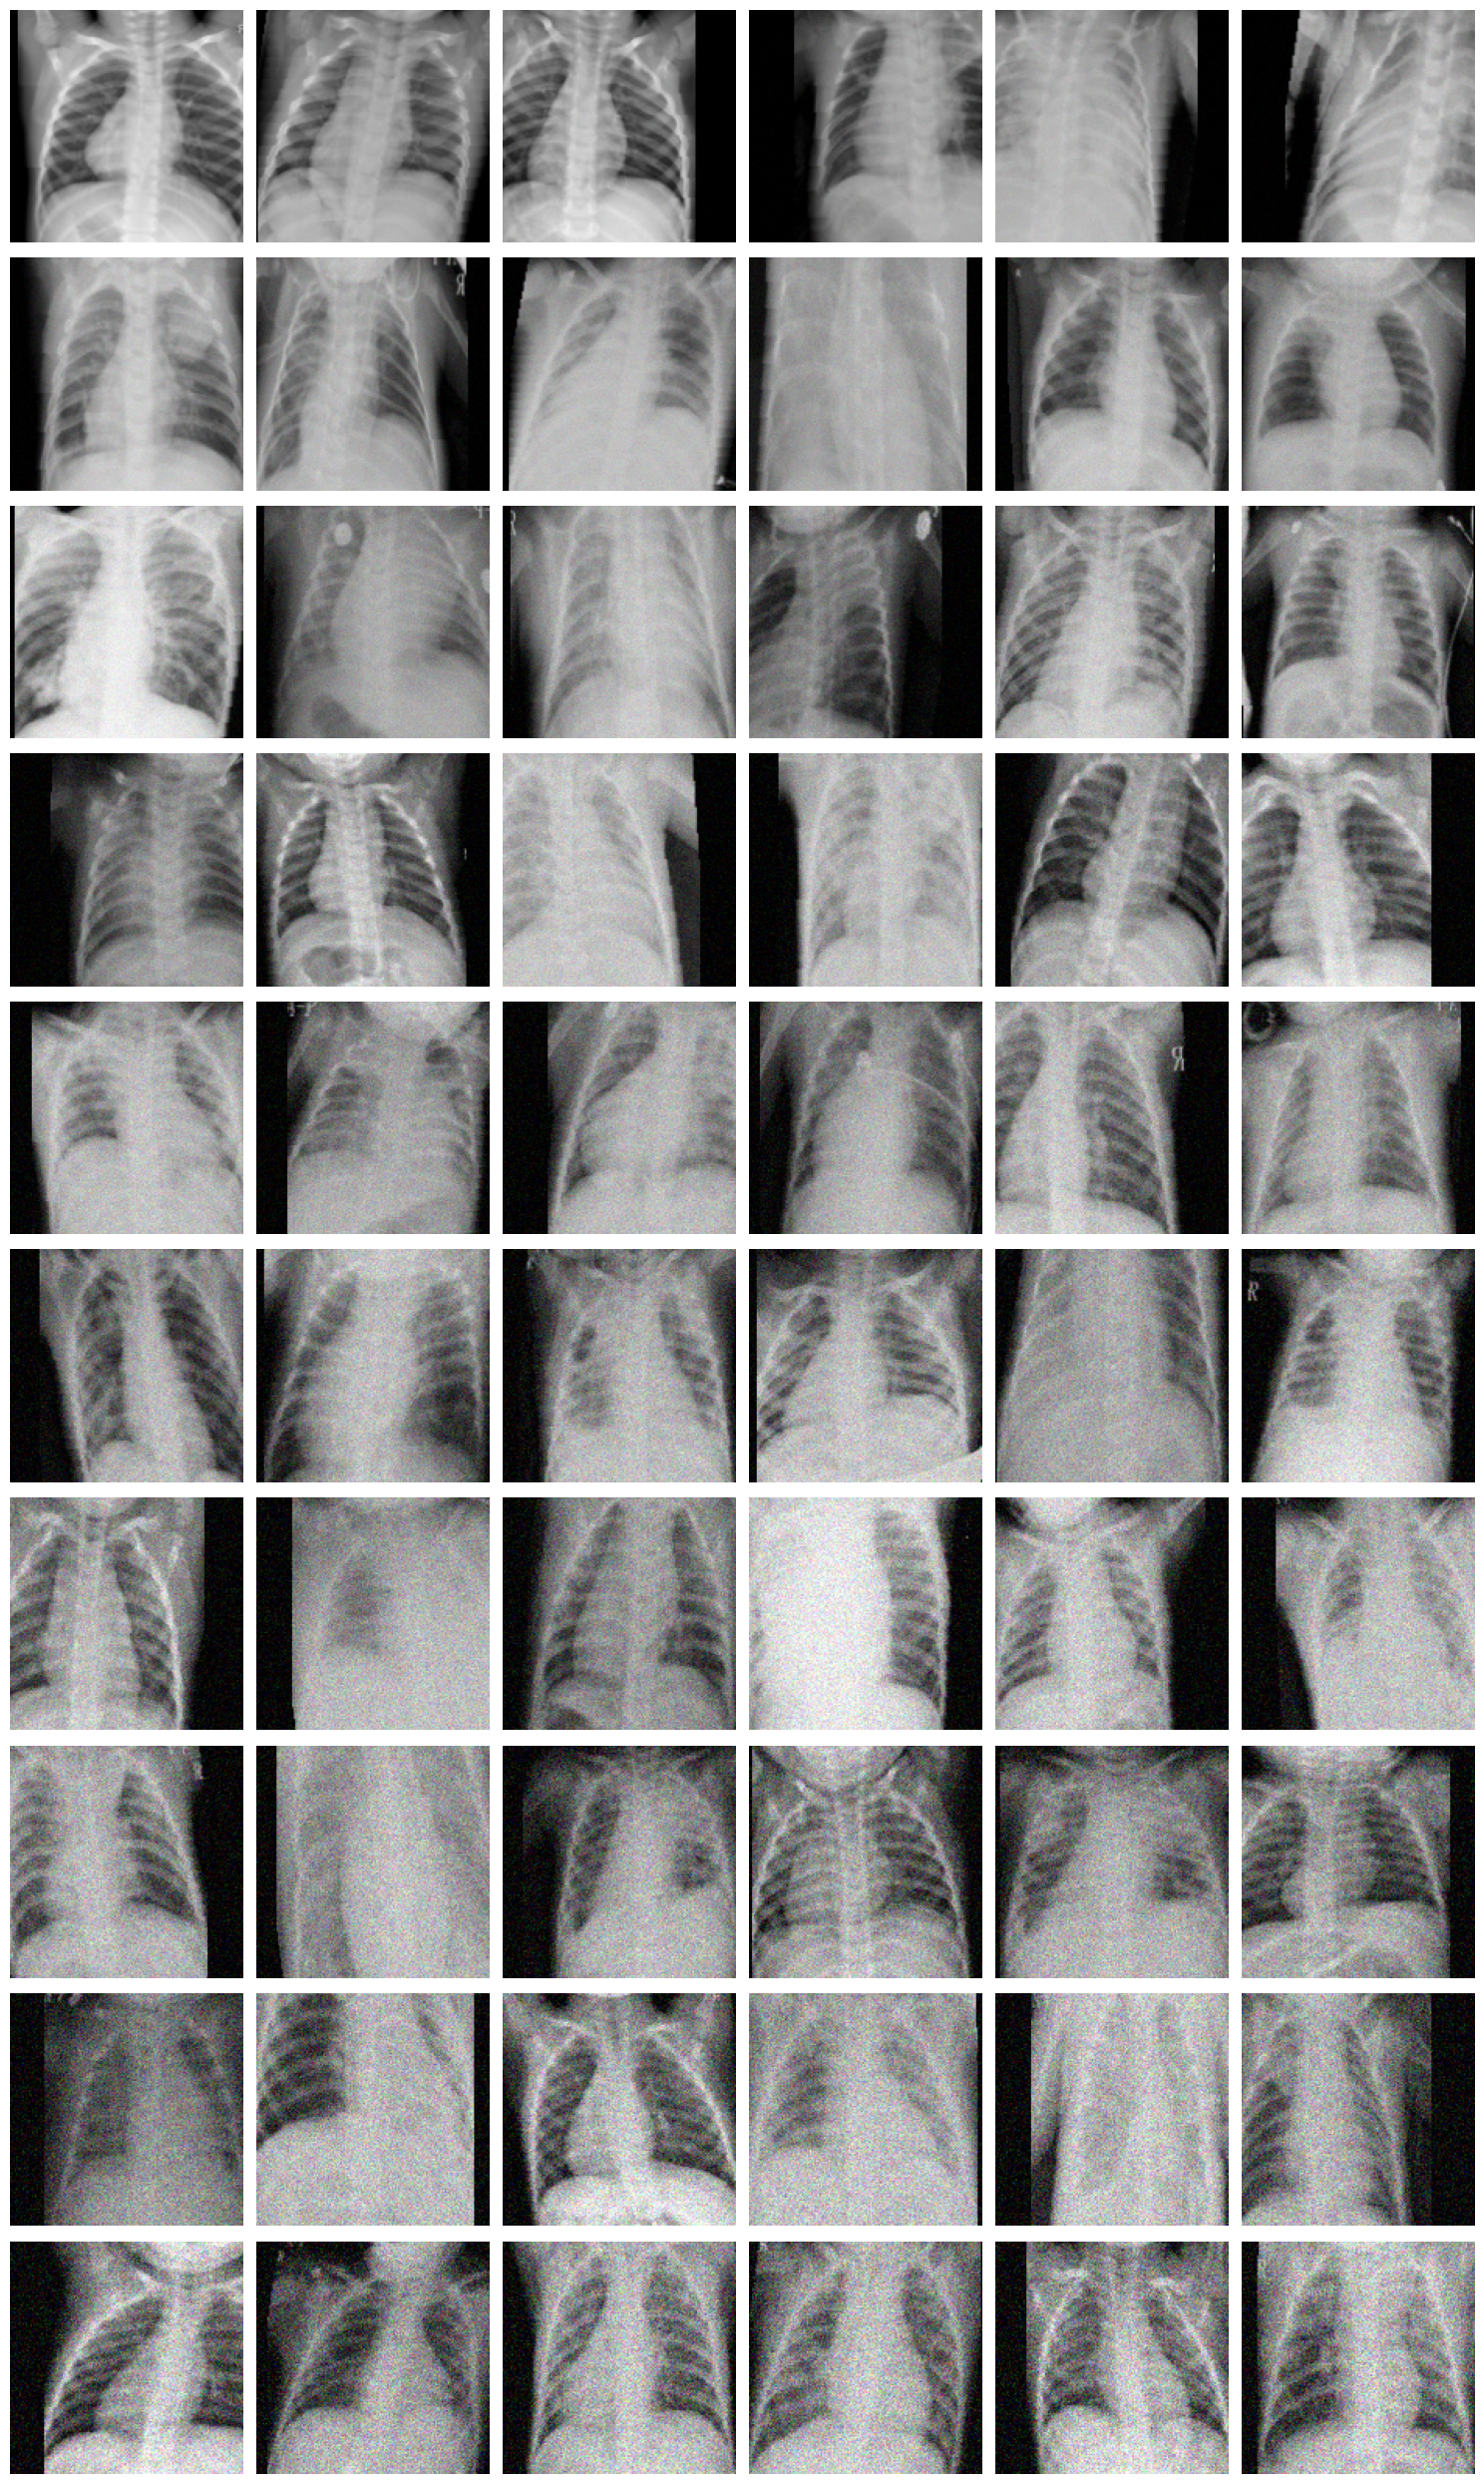

In [20]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Hàm đảo ngược chuẩn hóa
def unnormalize_image(image_tensor, mean, std):
    # Đảo ngược Normalize: (image * std) + mean
    for t, m, s in zip(image_tensor, mean, std):
        t.mul_(s).add_(m)  # Thực hiện từng kênh
    return image_tensor

# Hàm hiển thị ảnh từ một tensor
def display_image(image_tensor, mean, std):
    # Đảo ngược chuẩn hóa
    image_tensor = unnormalize_image(image_tensor, mean, std)
    # Chuyển tensor thành NumPy array và điều chỉnh thứ tự kênh màu (CHW -> HWC)
    image_numpy = image_tensor.permute(1, 2, 0).numpy()
    # Cắt giá trị ảnh về phạm vi [0, 1] để hiển thị đúng
    image_numpy = image_numpy.clip(0, 1)
    # Hiển thị ảnh
    plt.imshow(image_numpy)
    plt.axis('off')  # Tắt trục tọa độ

# Mean và std từ Normalize
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Khởi tạo một lưới 10x6 để hiển thị ảnh
fig, axes = plt.subplots(10, 6, figsize=(15, 25))

# Duyệt qua 60 trainloaders và hiển thị ảnh đầu tiên
for i, trainloader in enumerate(trainloaders[:60]):
    # Lấy ảnh đầu tiên từ trainloader
    image_tensor = trainloader.dataset[0][0].clone()  # Clone để tránh thay đổi dữ liệu gốc
    
    # Tìm vị trí hàng, cột trong lưới
    row, col = divmod(i, 6)
    plt.sca(axes[row, col])  # Đặt trục hiện tại là vị trí hàng, cột trong lưới
    display_image(image_tensor, mean, std)

# Điều chỉnh layout để không bị chồng lấn
plt.tight_layout()
plt.show()


In [21]:
import os
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Hàm đảo ngược chuẩn hóa
def unnormalize_image(image_tensor, mean, std):
    # Đảo ngược Normalize: (image * std) + mean
    for t, m, s in zip(image_tensor, mean, std):
        t.mul_(s).add_(m)  # Thực hiện từng kênh
    return image_tensor

# Hàm hiển thị ảnh từ một tensor
def display_image(image_tensor, mean, std):
    # Đảo ngược chuẩn hóa
    image_tensor = unnormalize_image(image_tensor, mean, std)
    # Chuyển tensor thành NumPy array và điều chỉnh thứ tự kênh màu (CHW -> HWC)
    image_numpy = image_tensor.permute(1, 2, 0).numpy()
    # Cắt giá trị ảnh về phạm vi [0, 1] để hiển thị đúng
    image_numpy = image_numpy.clip(0, 1)
    # Trả về ảnh NumPy
    return image_numpy

# Mean và std từ Normalize
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Tạo thư mục lưu ảnh nếu chưa tồn tại
output_dir = "running_outputs"
os.makedirs(output_dir, exist_ok=True)

# Khởi tạo một lưới 10x6 để hiển thị ảnh
fig, axes = plt.subplots(10, 6, figsize=(15, 25))

# Duyệt qua 60 trainloaders và hiển thị ảnh đầu tiên
for i, trainloader in enumerate(trainloaders[:60]):
    # Lấy ảnh đầu tiên từ trainloader
    image_tensor = trainloader.dataset[0][0].clone()  # Clone để tránh thay đổi dữ liệu gốc
    
    # Tìm vị trí hàng, cột trong lưới
    row, col = divmod(i, 6)
    plt.sca(axes[row, col])  # Đặt trục hiện tại là vị trí hàng, cột trong lưới
    
    # Hiển thị ảnh
    image_numpy = display_image(image_tensor, mean, std)
    axes[row, col].imshow(image_numpy)
    axes[row, col].axis('off')

# Điều chỉnh layout để không bị chồng lấn
plt.tight_layout()

# Lưu ảnh thay vì hiển thị
output_path = os.path.join(output_dir, "image_noise.png")
plt.savefig(output_path, dpi=300)  # Lưu ảnh với chất lượng cao
plt.close()  # Đóng figure

print(f"Ảnh đã được lưu tại {output_path}")


Ảnh đã được lưu tại running_outputs/image_noise.png
